<a href="https://colab.research.google.com/github/Venkata-Suresh-Babu/Airlines-flight-data-analysis/blob/main/Airlines_Flights_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airlines Flights Data Analysis

In [1]:
from google.colab import userdata
import os
os.environ['KAGGLE_USERNAME'] = userdata.get('Kaggle_Username')
os.environ['KAGGLE_KEY'] = userdata.get('Kaggle_Key')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#!kaggle datasets list

In [4]:
!kaggle datasets download -d rohitgrewal/airlines-flights-data

Dataset URL: https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data
License(s): DbCL-1.0
  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 597MB/s]


In [5]:
!unzip -o /content/airlines-flights-data.zip

Archive:  /content/airlines-flights-data.zip
  inflating: airlines_flights_data.csv  


In [6]:
flight = pd.read_csv('/content/airlines_flights_data.csv')
flight

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
flight.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [9]:
flight.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### What are the airlines in the dataset, accompanied by their frequencies?

In [10]:
flight['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

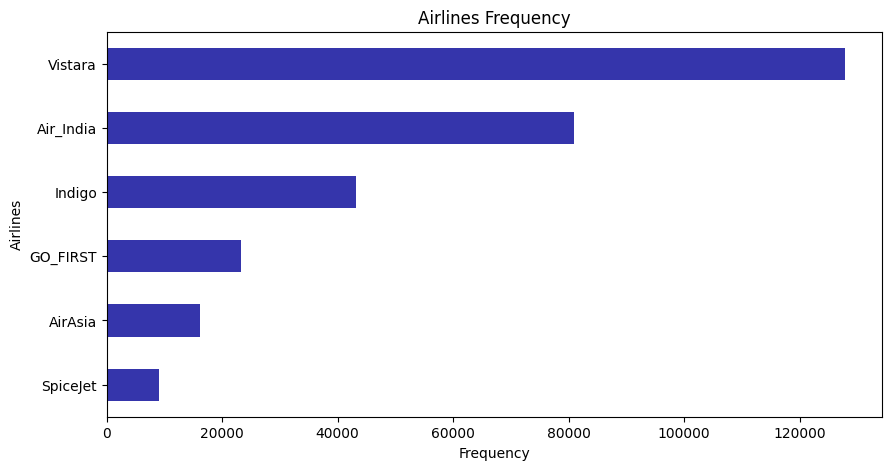

In [11]:
#plot bar graph airlines
plt.figure(figsize=(10, 5))
flight['airline'].value_counts(ascending=True).plot.barh(color = ['#3535AB'])
plt.title('Airlines Frequency')
plt.xlabel('Frequency')
plt.ylabel('Airlines')
plt.show()

In [12]:
min_price_airlines = flight.groupby('airline')['price'].min().sort_values(ascending=True)
min_price_airlines

,price
airline,
AirAsia,1105
GO_FIRST,1105
Indigo,1105
SpiceJet,1106
Air_India,1526
Vistara,1714


In [13]:
#max price airlines in descending order
max_price_airlines = flight.groupby('airline')['price'].max().sort_values(ascending=False)
max_price_airlines

,price
airline,
Vistara,123071
Air_India,90970
SpiceJet,34158
GO_FIRST,32803
Indigo,31952
AirAsia,31917


In [14]:
maximum_duration_airlines = flight.groupby('airline')['duration'].max().sort_values(ascending=False)
maximum_duration_airlines

,duration
airline,
Air_India,49.83
Vistara,47.08
SpiceJet,27.92
GO_FIRST,22.50
AirAsia,19.58
Indigo,15.42


In [15]:
minimum_duration_airlines = flight.groupby('airline')['duration'].min().sort_values(ascending=True)
minimum_duration_airlines

,duration
airline,
Indigo,0.83
AirAsia,0.92
Air_India,1.00
GO_FIRST,1.00
SpiceJet,1.00
Vistara,1.00


In [16]:
#flights with minimum duration and with minimum price
min_duration_min_price = flight[flight['duration'] == flight['duration'].min()]
min_duration_min_price.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498


###Show Bar Graphs representing the Departure Time & Arrival Time.

In [17]:
arrival_time = flight['arrival_time'].value_counts().sort_values(ascending=False)
arrival_time

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [18]:
#departure_time
departure_time = flight['departure_time'].value_counts().sort_values(ascending=False)
departure_time

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


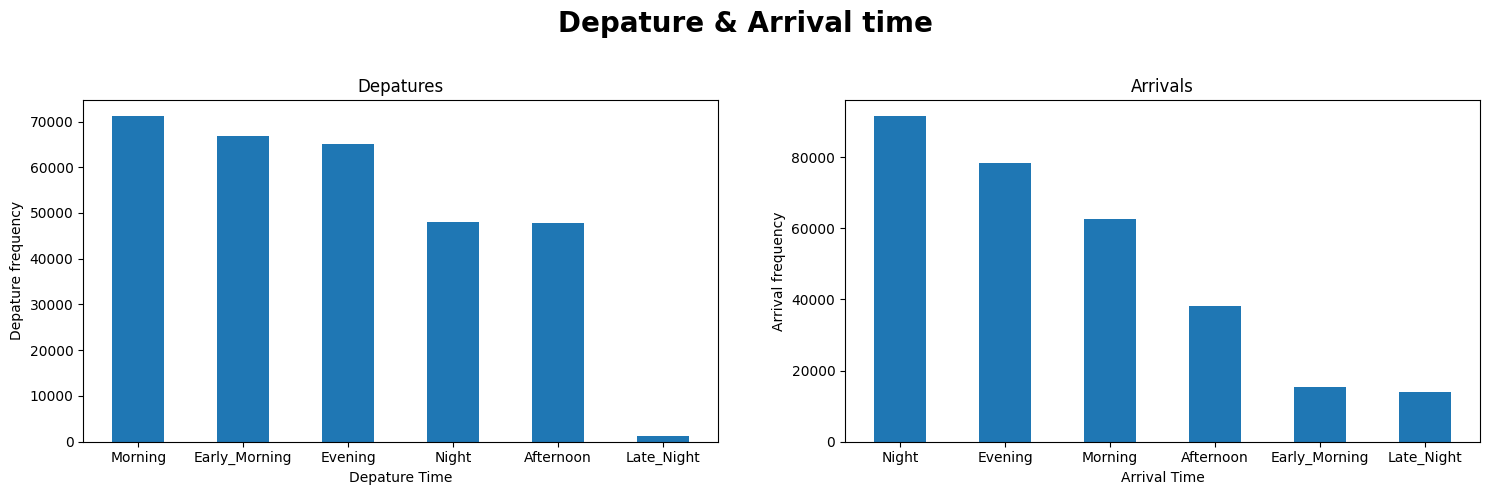

In [19]:
fig = plt.figure(figsize = (15, 5))
fig.suptitle('Depature & Arrival time', fontweight = 'bold', fontsize = 20)

plt.subplot(1,2,1)
plt.bar(departure_time.index, departure_time.values, width=0.5)
plt.title('Depatures')
plt.xlabel('Depature Time')
plt.ylabel('Depature frequency')

plt.subplot(1,2,2)
plt.bar(arrival_time.index, arrival_time.values, width=0.5)
plt.title('Arrivals')
plt.xlabel('Arrival Time')
plt.ylabel('Arrival frequency')

plt.tight_layout()
plt.subplots_adjust(top = 0.8, wspace = 0.2)
plt.show()

###Show Bar Graphs representing the Source City & Destination City.

In [20]:
source_city = flight['source_city'].value_counts(ascending=False)
source_city

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [21]:
destination_city = flight['destination_city'].value_counts(ascending=False)
destination_city

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


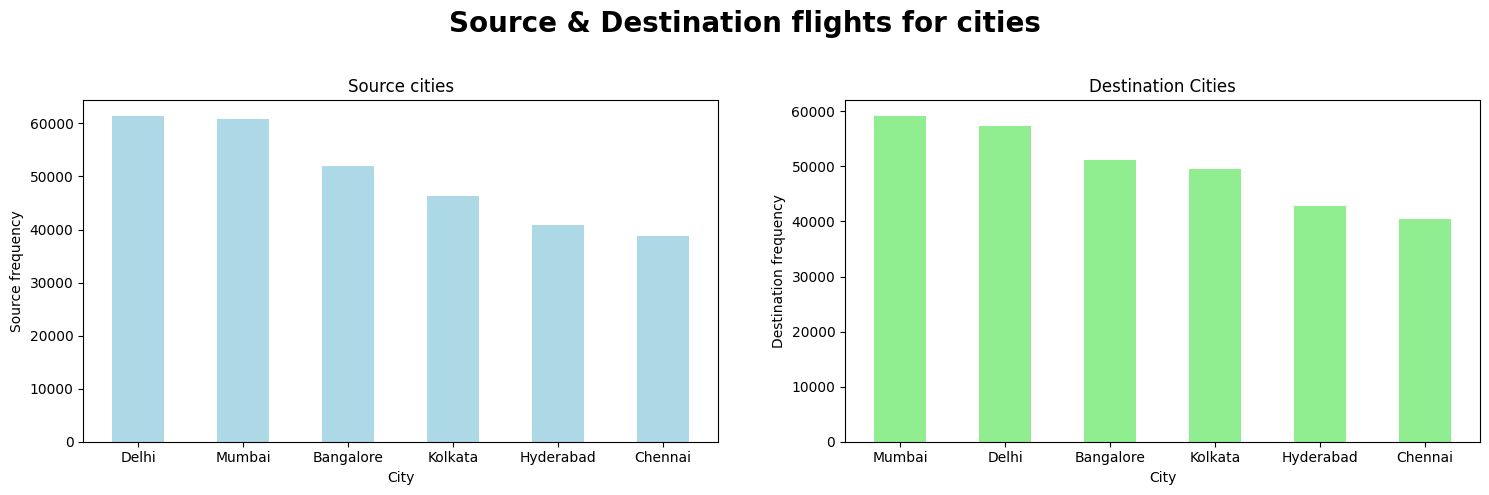

In [22]:
fig = plt.figure(figsize = (15, 5))
fig.suptitle('Source & Destination flights for cities', fontweight = 'bold', fontsize = 20)

plt.subplot(1,2,1)
plt.bar(source_city.index, source_city.values, width = 0.5, color = 'lightblue')
plt.title('Source cities')
plt.xlabel('City')
plt.ylabel('Source frequency')

plt.subplot(1,2,2)
plt.bar(destination_city.index, destination_city.values, width = 0.5, color = 'lightgreen')
plt.title('Destination Cities')
plt.xlabel('City')
plt.ylabel('Destination frequency')

plt.tight_layout()
plt.subplots_adjust(top = 0.8, wspace = 0.2)
plt.show()

### Does price varies with airlines ?

In [23]:
avg_airline_price = flight.groupby('airline')['price'].mean().sort_values(ascending=False)
avg_airline_price

,price
airline,
Vistara,30396.536302
Air_India,23507.019112
SpiceJet,6179.278881
GO_FIRST,5652.007595
Indigo,5324.216303
AirAsia,4091.072742


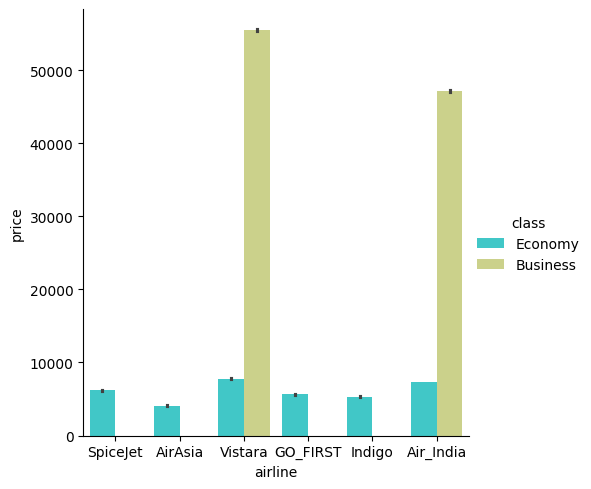

In [24]:
sns.catplot(x = 'airline', y = 'price', kind = 'bar', palette='rainbow', data = flight, hue = 'class')
plt.show()

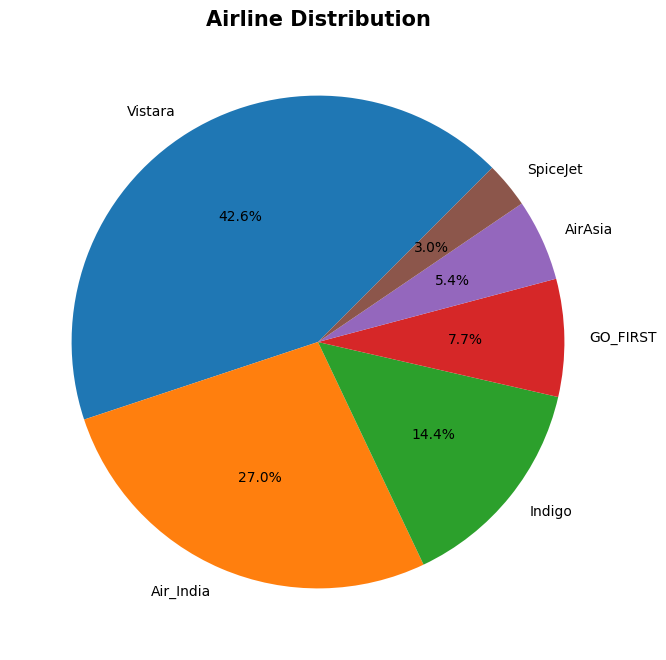

In [25]:
plt.figure(figsize=(10, 8))
plt.pie(flight['airline'].value_counts(), labels=flight['airline'].value_counts().index, autopct='%1.1f%%', startangle=45)
plt.title('Airline Distribution', fontdict={'fontweight': 'bold', 'fontsize':15})
plt.show()

###Does ticket price change based on the departure time and arrival time

In [26]:
flight.head(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [27]:
depature_time_price = flight.groupby('departure_time')['price'].mean().sort_values(ascending = False)
depature_time_price

,price
departure_time,
Night,23062.146808
Morning,21630.760254
Evening,21232.361894
Early_Morning,20370.676718
Afternoon,18179.203331
Late_Night,9295.299387


In [28]:
arrival_time_price = flight.groupby('arrival_time')['price'].mean().sort_values(ascending = False)
arrival_time_price

,price
arrival_time,
Evening,23044.371615
Morning,22231.076098
Night,21586.758341
Afternoon,18494.598993
Early_Morning,14993.139521
Late_Night,11284.906078


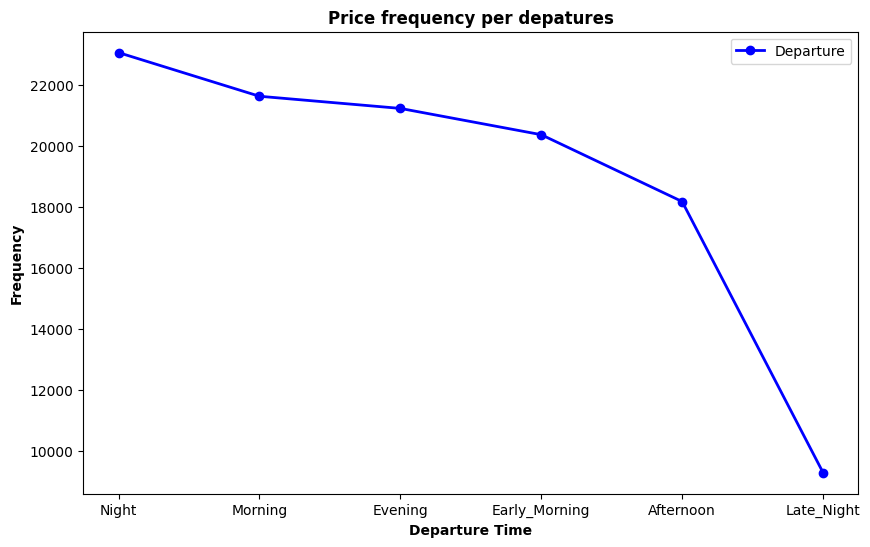

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(depature_time_price.index, depature_time_price.value_counts().index, lw = 2, color = 'b', label = 'Departure', marker = 'o')
plt.title('Price frequency per depatures', fontweight = 'bold')
plt.xlabel('Departure Time', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.legend()
plt.show()

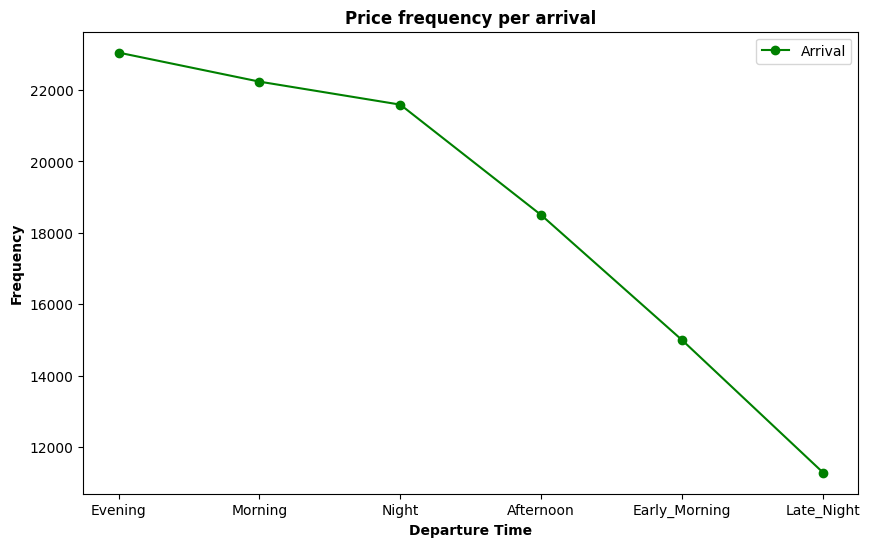

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(arrival_time_price.index, arrival_time_price.value_counts().index, lw = 1.5, color = 'g', label = 'Arrival', marker = 'o')
plt.title('Price frequency per arrival', fontweight = 'bold')
plt.xlabel('Departure Time', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.legend()
plt.show()

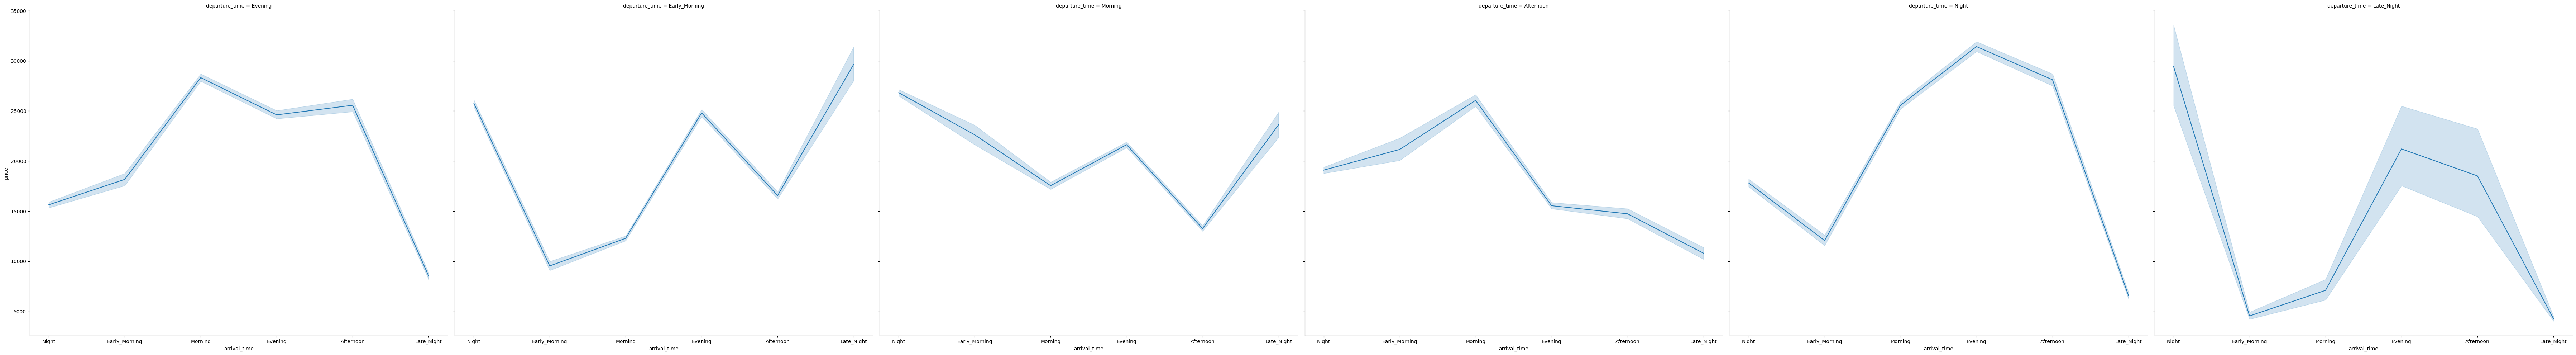

In [31]:
sns.relplot(x = 'arrival_time', y = 'price', data = flight, col = 'departure_time', kind = 'line', height=10, aspect=1.2)
plt.show()

### How the price changes with change in Source and Destination

In [32]:
flight.head(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [33]:
source_price_frequency = flight.groupby('source_city')['price'].mean().sort_values(ascending = False)
source_price_frequency

,price
source_city,
Chennai,21995.339871
Kolkata,21746.235679
Mumbai,21483.818839
Bangalore,21469.460575
Hyderabad,20155.623879
Delhi,18951.326639


In [34]:
destination_price_frequency = flight.groupby('destination_city')['price'].mean().sort_values(ascending = False)
destination_price_frequency

,price
destination_city,
Kolkata,21959.557556
Chennai,21953.323969
Bangalore,21593.955784
Mumbai,21372.529469
Hyderabad,20427.661284
Delhi,18436.767870


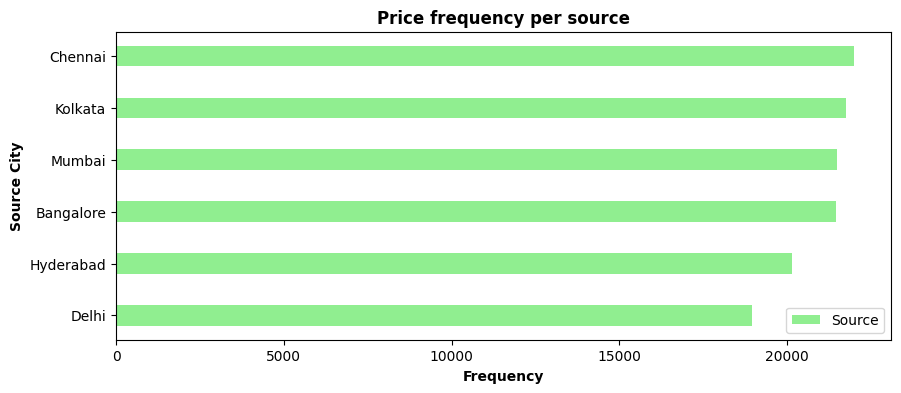

In [35]:
plt.figure(figsize=(10, 4))
source_sorted_values = source_price_frequency.sort_values(ascending = True)
plt.barh(source_sorted_values.index, source_sorted_values.values, color = 'lightgreen', label = 'Source', height = 0.4)
plt.title('Price frequency per source', fontweight = 'bold')
plt.xlabel('Frequency', fontweight = 'bold')
plt.ylabel('Source City', fontweight = 'bold')
plt.legend()
plt.show()

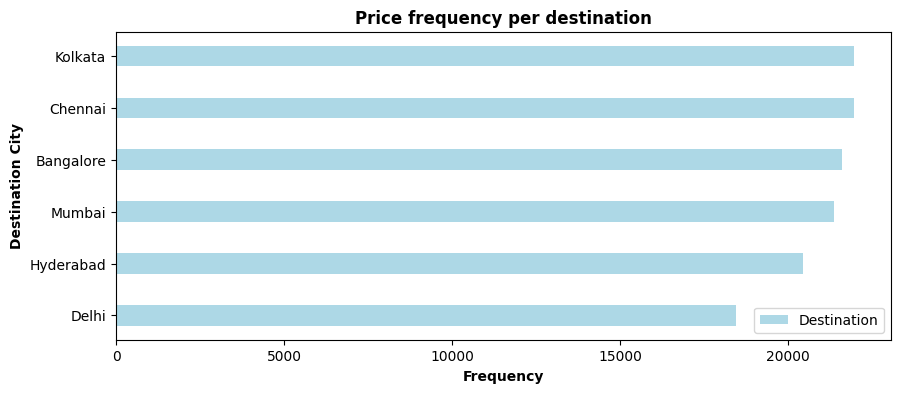

In [36]:
plt.figure(figsize=(10, 4))
destination_sorted_values = destination_price_frequency.sort_values(ascending = True)
plt.barh(destination_sorted_values.index, destination_sorted_values.values, color = 'lightblue', label = 'Destination', height = 0.4)
plt.title('Price frequency per destination', fontweight = 'bold')
plt.xlabel('Frequency', fontweight = 'bold')
plt.ylabel('Destination City', fontweight = 'bold')
plt.legend()
plt.show()

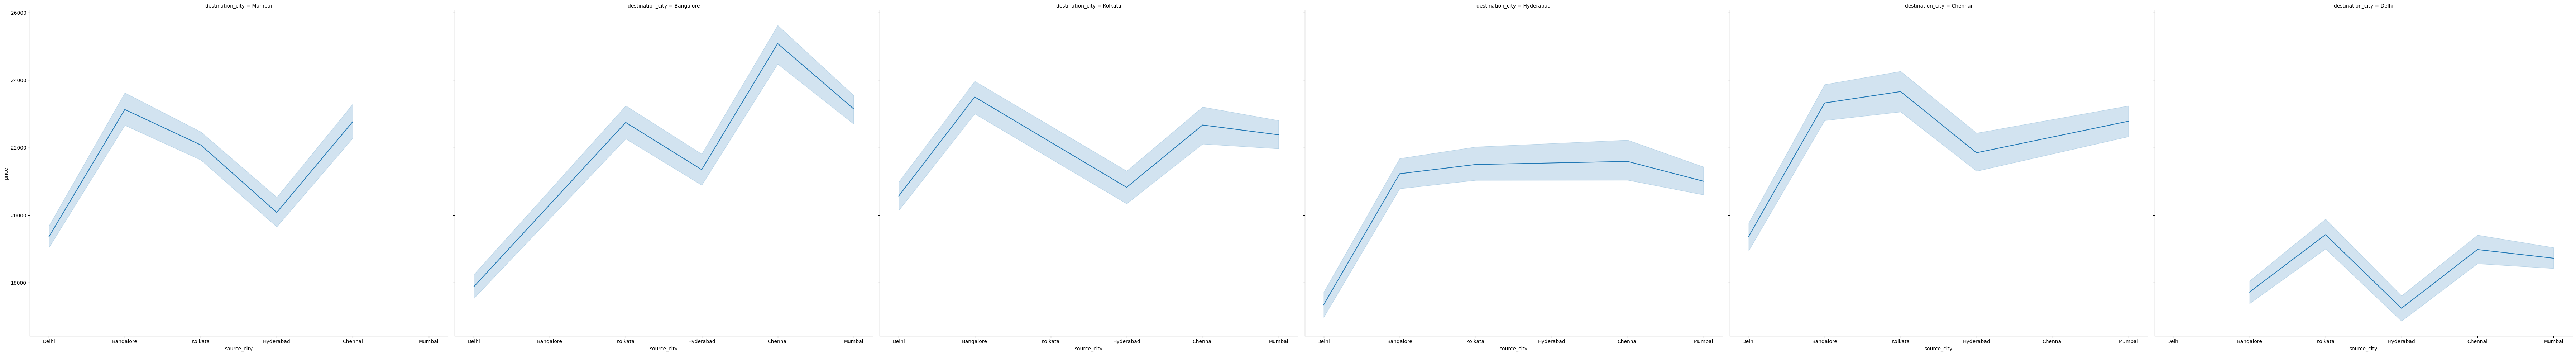

In [37]:
sns.relplot(x = 'source_city', y = 'price', data = flight, col = 'destination_city', kind = 'line', height=10, aspect=1.2)
plt.show()

### How is the price affected when tickets are bought in just 1 or 2 days before departure

In [38]:
flight.head(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [39]:
days = flight['days_left'].nunique()
days

49

In [40]:
flight['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

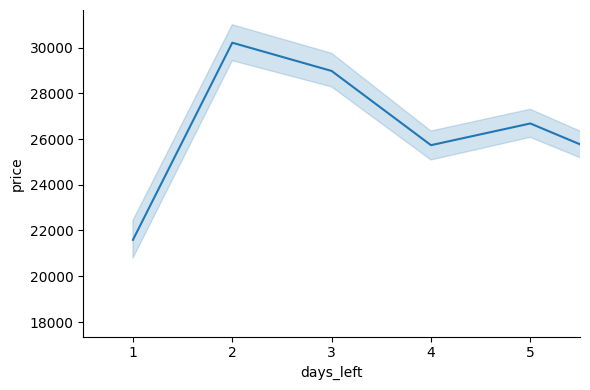

In [50]:
sorted_days = flight.sort_values('days_left')
sns.relplot(x = 'days_left', y = 'price', kind = 'line', data = sorted_days, height = 4, aspect = 1.5)
plt.xticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)
plt.show()

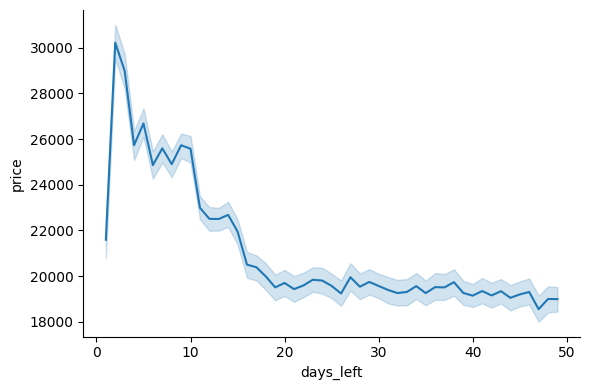

In [51]:
sns.relplot(y = 'price', x = 'days_left', kind = 'line', data = flight, height = 4, aspect = 1.5)
plt.show()

### How does the ticket price vary between Economy and Business class

In [53]:
class_price = flight.groupby('class')['price'].mean()
class_price

,price
class,
Business,52540.081124
Economy,6572.342383


In [56]:
airline_class_group = flight.groupby(['airline', 'class'])['price'].mean()
airline_class_group

airline    class   
AirAsia    Economy      4091.072742
Air_India  Business    47131.039212
           Economy      7313.682169
GO_FIRST   Economy      5652.007595
Indigo     Economy      5324.216303
SpiceJet   Economy      6179.278881
Vistara    Business    55477.027777
           Economy      7806.943645
Name: price, dtype: float64

### What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class?

In [66]:
avg_price_in_vistara = flight[(flight['airline'] == 'Vistara') & (flight['class'] == 'Business')&
 (flight['source_city'] == 'Delhi')&
 (flight['destination_city'] == 'Hyderabad')]['price']

In [67]:
avg_price_in_vistara

,price
219123,30630
219124,38470
219129,63513
219130,65764
219131,69113
...,...
221863,53937
221864,59537
221865,59537
221866,61889


In [68]:
print(avg_price_in_vistara.mean())

47939.840361445786
